In [1]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
import datetime 


%matplotlib inline

In [2]:
games_df = pd.read_csv('./games_table.csv').drop('Unnamed: 0',axis=1)
players_df = pd.read_csv('./players_table.csv').drop('Unnamed: 0',axis=1)

In [ ]:
players_df[players_df['id']==845]['points'].values[0]

In [ ]:
p1_win = []
p2_win = []

In [ ]:
for i,row in games_df.iterrows():
    p1_id = row['p1_id']
    p2_id = row['p2_id']
    winner_id = row['winner_id']
    if p1_id == winner_id:
        p1_win.append(1)
        p2_win.append(0)        
    else:
        p1_win.append(0)
        p2_win.append(1)        

In [ ]:
data = pd.DataFrame({'p1_win':p1_win,'p2_win':p2_win})

In [ ]:
games_df = games_df.join(data)

In [ ]:
games_df['p1_id'] = games_df['p1_id'].astype(object)
games_df['p2_id'] = games_df['p2_id'].astype(object)
games_df['winner_id'] = games_df['winner_id'].astype(object)
games_df['match_id'] = games_df['match_id'].astype(object)


<AxesSubplot:ylabel='p1_win'>

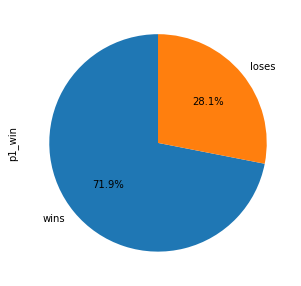

In [3]:
temp_df = games_df[games_df['p1_prevwins']>games_df['p2_prevwins']].copy()
temp_df['p1_win'].value_counts().plot.pie( figsize=(5, 5),autopct='%1.1f%%',startangle=90 ,labels=['wins','loses'])

### Checking the home games importance over the year
Here we will try to see the trend of home games vs games away over the last years

In [4]:
years = ['2014','2015','2016','2017','2018','2019','2020','2021']
home_wins_count = []
home_loses_count=[]

In [5]:
for i in range(len(years)):
    home_wins = 0
    home_loses = 0
    mask = (games_df['date'] >= years[i]) & (games_df['date'] < str(int(years[i])+1))
    for j,row in games_df.loc[mask].iterrows():
        if row['p1_home'] != np.nan:
            if row['p1_win']==1:
                if row['p2_home']==1:
                    home_loses+=1
                else:
                    home_wins+=1
        else:
            pass
    home_wins_count.append(home_wins)
    home_loses_count.append(home_loses)

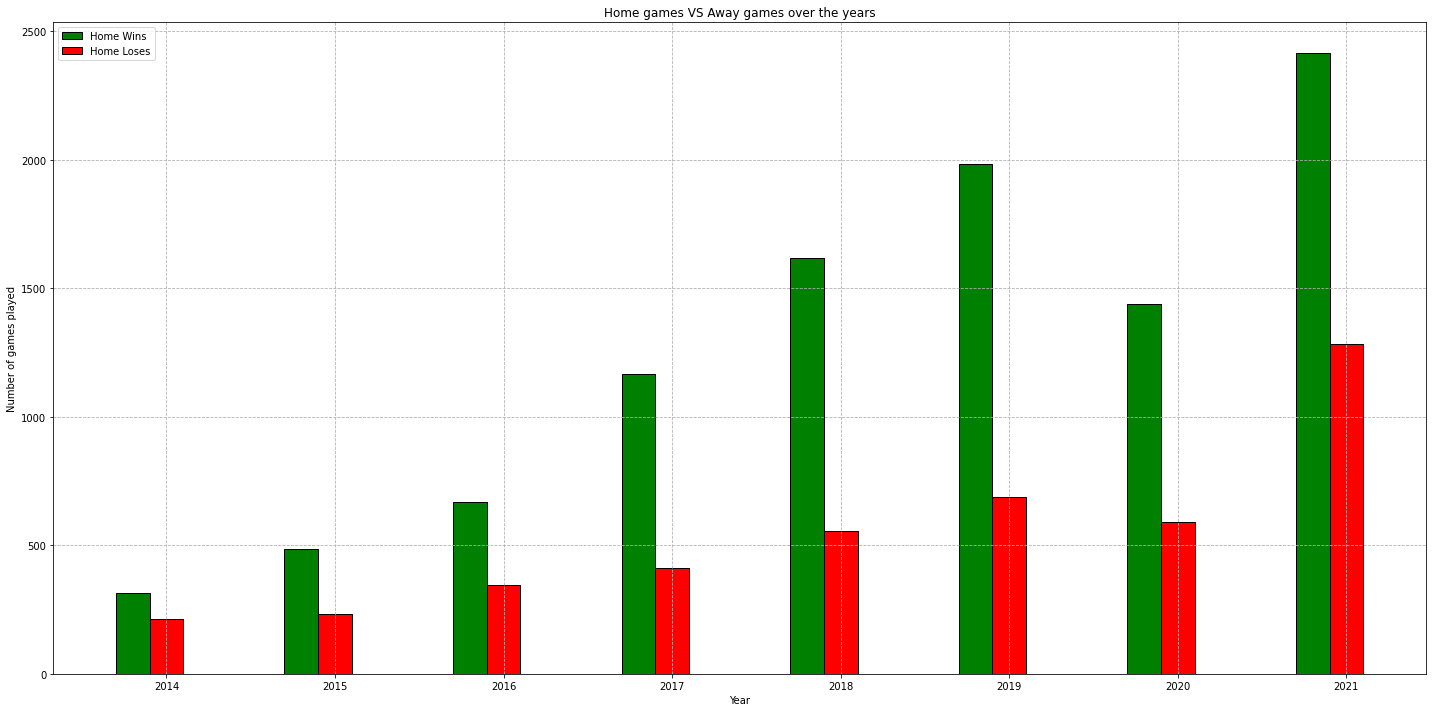

In [6]:
plt.figure(figsize=(20,10))
n=8
r = np.arange(n)
width = 0.2

plt.bar(r, home_wins_count, color = 'green',
        width = width, edgecolor = 'black',
        label='Home Wins')
plt.bar(r + width, home_loses_count, color = 'red',
        width = width, edgecolor = 'black',
        label='Home Loses')
  
plt.xlabel("Year")
plt.ylabel("Number of games played")
plt.title("Home games VS Away games over the years")
  

    
plt.tight_layout()
plt.grid(linestyle='--')
plt.xticks(r + width,years)
plt.legend()
  

#### As we can see since 2017 there is a great advantage by playing the matches at home

### Now let's create a column that shows the difference between the two players points

In [7]:
games_df['points_diff'] = games_df['p1_rank'] - games_df['p2_rank']
games_df['diff_win'] = games_df['p1_win'] - games_df['p2_win']
games_df


,match_id,match_type,date,p1_id,p1_name,p1_club,p1_rank,p1_sets,p1_home,p1_points_gained,...,p2_points_gained,winner_id,p1_prevwins,p2_prevwins,p1_form,p2_form,p1_win,p2_win,points_diff,diff_win
0,286499,ליגת על גברים 2021-2022,2021-12-28,745,יונתן שוסטרמן,מ. בני הרצליה,1778.3,2,0.0,-21.0,...,31.5,741,16,0,7.5,24.5,0,1,347.9,-1
1,282431,ליגת על גברים 2021-2022,2021-12-14,745,יונתן שוסטרמן,מ. בני הרצליה,1778.3,3,1.0,4.5,...,-3.0,745,6,0,-12.0,16.5,1,0,365.5,1
2,282435,ליגת על גברים 2021-2022,2021-12-14,745,יונתן שוסטרמן,מ. בני הרצליה,1778.3,3,1.0,3.0,...,-2.0,745,3,0,-10.5,8.5,1,0,428.3,1
3,281142,ליגת על גברים 2021-2022,2021-12-07,745,יונתן שוסטרמן,מ. בני הרצליה,1778.3,3,1.0,1.5,...,-1.0,745,2,0,-16.5,0.0,1,0,678.5,1
4,281146,ליגת על גברים 2021-2022,2021-12-07,745,יונתן שוסטרמן,מ. בני הרצליה,1778.3,0,1.0,-18.0,...,27.0,2284,0,0,3.0,10.4,0,1,255.5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27311,226495,ליגת ארצית גברים 2019-2020,2020-01-29,849,מקסים קוקוטוב,אליצור קריית אתא,668.6,2,0.0,-5.0,...,5.0,1532,0,0,2.0,-21.0,0,1,-0.5,-1
27312,226497,ליגת ארצית גברים 2019-2020,2020-01-29,849,מקסים קוקוטוב,אליצור קריית אתא,668.6,0,0.0,-2.0,...,2.0,1439,0,0,1.0,24.0,0,1,-260.3,-1
27313,225328,ליגת ארצית גברים 2019-2020,2020-01-22,849,מקסים קוקוטוב,אליצור קריית אתא,668.6,3,1.0,14.0,...,-14.0,849,1,0,-1.0,12.0,1,0,-81.1,1
27314,223806,ליגת ארצית גברים 2019-2020,2020-01-15,849,מקסים קוקוטוב,אליצור קריית אתא,668.6,3,0.0,7.0,...,-7.0,849,0,0,-8.0,0.0,1,0,94.2,1


In [8]:
games_df['diff_win'].corr(games_df['points_diff'])

0.5038070146070197

In [9]:
games_df.drop_duplicates('match_id',inplace=True)
def cross_tabulation(df, col_name, other_col_name):
    ct = pd.crosstab(df[col_name],df[other_col_name],normalize='index')
    return ct

def is_positive(row):
    if float(row['points_diff'])>=0:
        return 1
    else:
        return 0

<AxesSubplot:xlabel='p1_form', ylabel='p1_points_gained'>

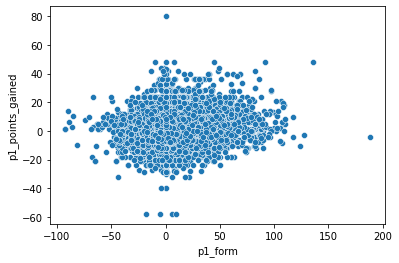

In [10]:
games_df['diff_positive'] = games_df.apply (lambda row: is_positive(row), axis=1)
df_crosstab = cross_tabulation(games_df, 'points_diff', 'p1_win')
#sns.scatterplot(x='points_diff',y='p1_points_gained',data=games_df)
sns.scatterplot(x='p1_form',y='p1_points_gained',data=games_df)


array([[<AxesSubplot:title={'center':'points_diff'}>]], dtype=object)

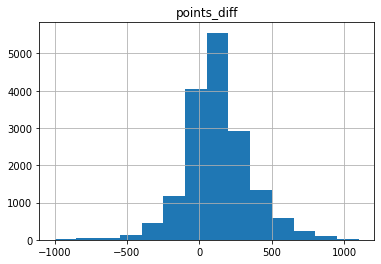

In [11]:
games_df.hist(column='points_diff', bins = np.arange(-1000,1200,150))

In this histogram we can see how many games were played with each points difference

In [12]:
def get_highly_correlated_cols(df):
    columns = df.columns
    correlations = []
    tuple_arr = []
    for i in range(len(columns)):
        for j in range(i+1,len(columns)):
            curr = columns[i]
            curr_next = columns[j]
            temp_corr_df = df[[curr, curr_next]].corr()
            curr_value = temp_corr_df[curr][curr_next]
            if(curr_value>=0.4):
                correlations.append(curr_value)
                tuple_arr.append((i,j))
    tuple_arr = tuple(tuple_arr)
    print(tuple_arr)
    return correlations, tuple_arr

In [13]:
def plot_high_correlated_scatters(df):
    columns = df.columns
    corr_arr,tuples_arr = get_highly_correlated_cols(df)
    fig, axs = plt.subplots(1,len(corr_arr),figsize=(15,5))
    for i in range(len(tuples_arr)):
        first_col = columns[tuples_arr[i][0]]
        second_col = columns[tuples_arr[i][1]]
        temp_df = cross_tabulation(df,first_col,second_col)
        title = "corr('%s', '%s')=%4.2f" % (first_col,second_col,corr_arr[i])
        axs[i].scatter(df[first_col], df[second_col])
        axs[i].set_title(title)
    fig.tight_layout()

((0, 6), (0, 11), (2, 3), (2, 6), (6, 11))


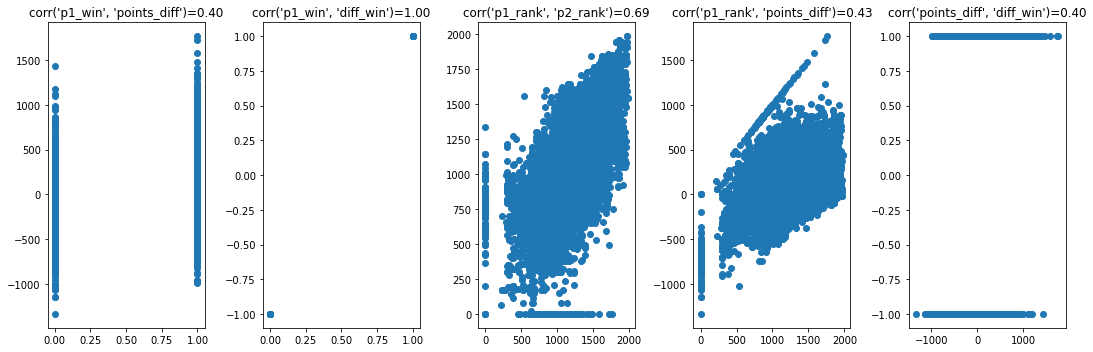

In [14]:
cols_for_corr = ['p1_win','p2_win','p1_rank','p2_rank','p1_home','p2_home','points_diff','p1_form','p2_form','p1_prevwins','p2_prevwins','diff_win']

plot_high_correlated_scatters(games_df[cols_for_corr])



In [15]:
games_df.to_csv('games_table.csv',sep = ',',encoding = "utf-8-sig")

In [16]:
temp_df = games_df.copy()
temp_df.drop_duplicates('match_id',inplace=True)

## Check the difference between the rank and the wins:
#### most of the time the player with the higher rank is more likely to win

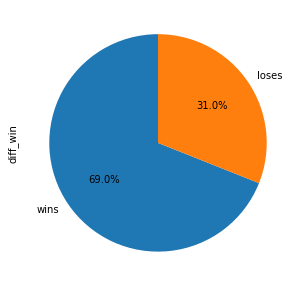

In [17]:
plot = temp_df['diff_win'].value_counts().plot.pie(y='diff_win', figsize=(5, 5),autopct='%1.1f%%',startangle=90 ,labels=['wins','loses'])


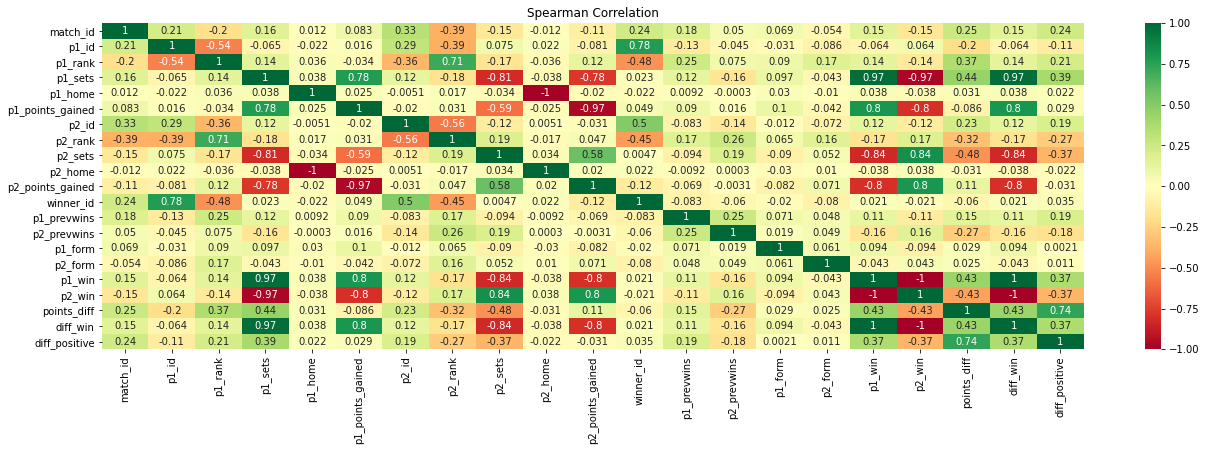

In [18]:
import seaborn as sns

corr_spearman = games_df.corr(method='spearman')

fig = plt.figure(figsize = (22,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin = -1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

/Users/yoni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points_diff'>

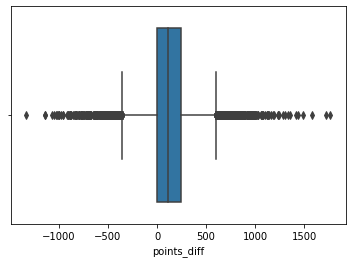

In [19]:
sns.boxplot(games_df.points_diff)


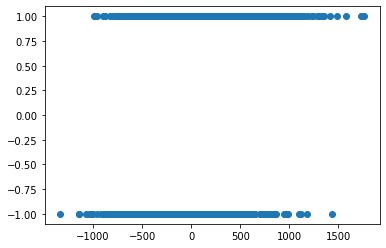

In [20]:
plt.scatter(games_df.points_diff,games_df.diff_win)

/Users/yoni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_win', ylabel='points_diff'>

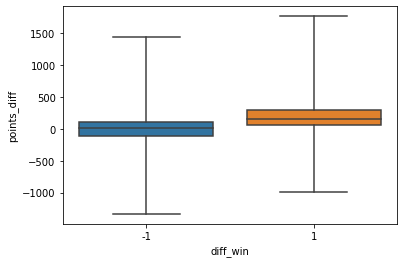

In [21]:
sns.boxplot(games_df.diff_win,games_df.points_diff,whis=7)


/Users/yoni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_win', ylabel='points_diff'>

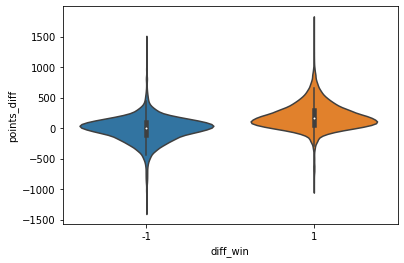

In [22]:
sns.violinplot(games_df.diff_win,games_df.points_diff,whis=7)


In [23]:
from scipy.stats import chi2_contingency 

<AxesSubplot:xlabel='points_diff'>

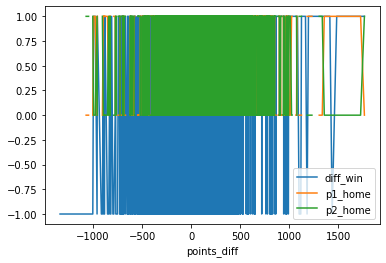

In [24]:
ct1=pd.crosstab(games_df['points_diff'],games_df['diff_win'])
chi2_contingency(ct1)
h=games_df.groupby(['points_diff']).mean()[['diff_win','p1_home','p2_home']]
h.plot()

<AxesSubplot:xlabel='points_diff'>

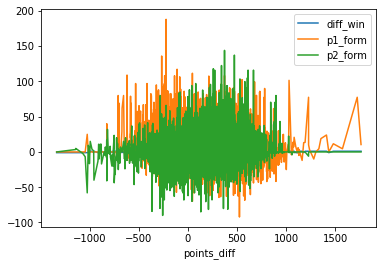

In [25]:
h2=games_df.groupby(['points_diff']).mean()[['diff_win','p1_form','p2_form']]
h2.plot()

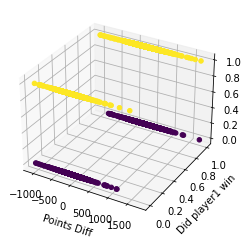

In [26]:
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
ax=plt.axes(projection="3d")

xdata=games_df.points_diff
ydata=games_df.p1_win
zdata=games_df.p1_home

plt.xlabel("Points Diff")
plt.ylabel("Did player1 win")
ax.scatter3D(xdata,ydata,zdata,c=zdata,depthshade=False)


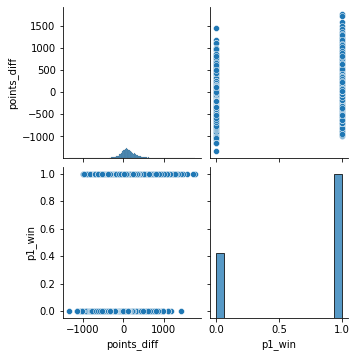

In [27]:
sns.pairplot(games_df[['points_diff', 'p1_win']])

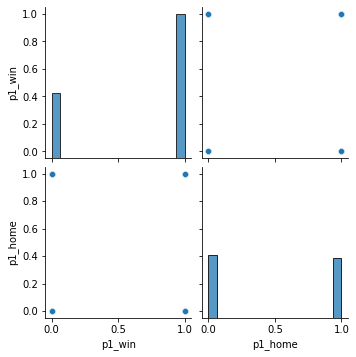

In [28]:
sns.pairplot(games_df[['p1_win', 'p1_home']])

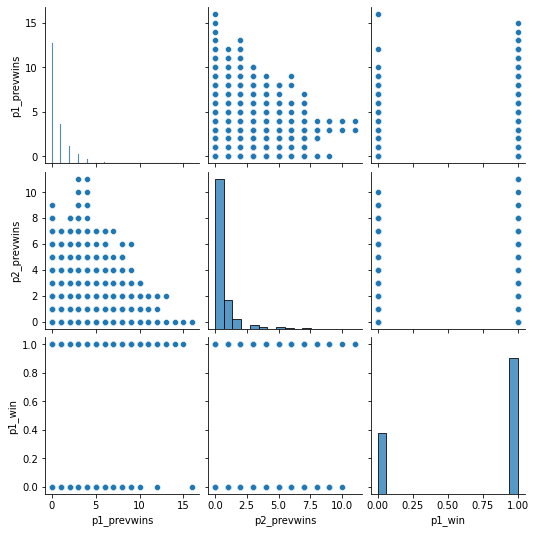

In [29]:
sns.pairplot(games_df[['p1_prevwins', 'p2_prevwins','p1_win']])